# Tree Modeling

Talk about xmas and tradition of trees...

LED and microprocessors are game changers for decorations...

The goal is to make the Christmas tree to blink in beautiful, complex, patterns.
Some examples of pattern include 
- rainbow stripes moving vertically/horizontally along the tree, 
- exploding flashes originated in a random spot, emanating across the tree,
- radial stripes rotating from the center of the tree

These patterns are generated by a program running on a microcontroller. Here, we call this program a **Pattern-Generator Algorithm**. These algorithms are functions of time and space, thus, the position of the LED bulbs must be known. The process of estimating the LED bulb locations is named **Tree Modeling**.

We will model the tree in this notebook using videos of the tree blinking tree. Later, we will implement the tree model in the microcontroller's pattern-generator algorithm.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

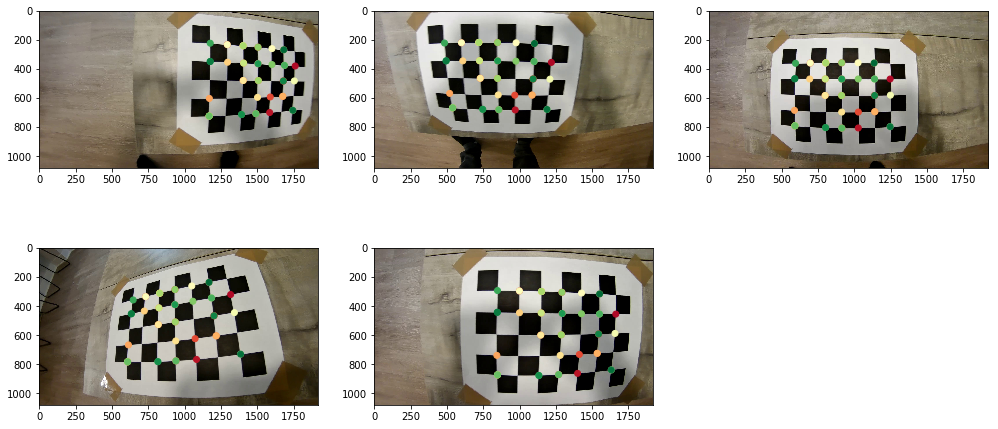

In [2]:
from xmas_lights import load_checkerboard_dataset, load_cam_calib, plot_images, plot_extrinsics

calib_intrinsics = load_cam_calib('./akaso_calib')
K = calib_intrinsics["K"]
D = calib_intrinsics["D"]

imgpoints, imgs, ground_truth = load_checkerboard_dataset('./akaso_calib')

plot_images(imgs, imgpoints)

`xtol` termination condition is satisfied.
Number of iterations: 815, function evaluations: 887, CG iterations: 11412, optimality: 1.09e-06, constraint violation: 0.00e+00, execution time: 4e+01 s.


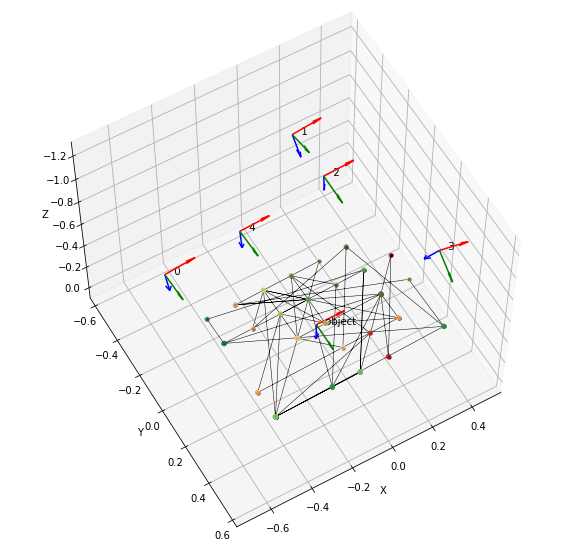

In [3]:
from xmas_lights import Calibrator

xtmodel = Calibrator(imgpoints, K, D)
rvecs, tvecs, objpoints, res = xtmodel.extrinsic_calibration()

plot_extrinsics(rvecs, tvecs, objpoints)


## Comparing to the ground truth

The calibrator cannot estimate the true scale, and the position and orientation of the inertial frame. This is fine because we can manually measure the height of the tree and assign a tree origin anywhere we want.

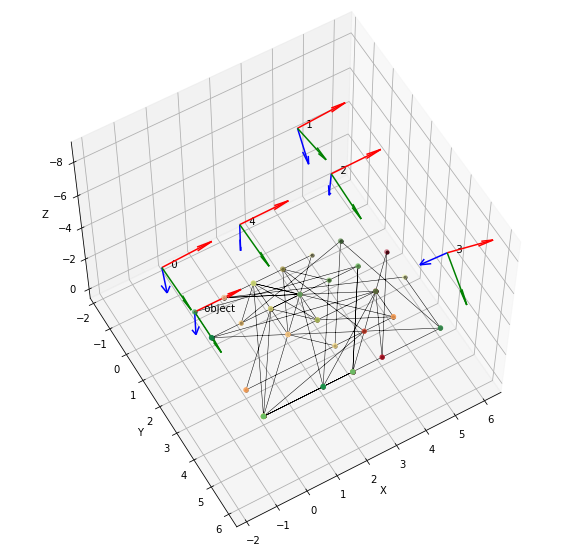

In [4]:
plot_extrinsics(ground_truth["rvecs"], ground_truth["tvecs"], ground_truth["objpoints"])